#**Data Preprocessing**

In [ ]:
!cp '/content/drive/MyDrive/Kase_D/Project 1/RPS_Datasets.zip' '/content/' && unzip '/content/RPS_Datasets.zip' -d '/content/datasets'

Archive:  /content/RPS_Datasets.zip
   creating: /content/datasets/paper/
  inflating: /content/datasets/paper/04l5I8TqdzF9WDMJ.png  
  inflating: /content/datasets/paper/0Og76sl5CJhbxWWx.png  
  inflating: /content/datasets/paper/0RA9rcrv8iVvuDDU.png  
  inflating: /content/datasets/paper/0Uomd0HvOB33m47I.png  
  inflating: /content/datasets/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: /content/datasets/paper/0cb6cVL8pkfi4wF6.png  
  inflating: /content/datasets/paper/0eqArS2GgsBeqgSn.png  
  inflating: /content/datasets/paper/0t08v9bAaA0mXGCQ.png  
  inflating: /content/datasets/paper/0vugygEjxQJPr9yz.png  
  inflating: /content/datasets/paper/0zKU6wEhT2cDe9j0.png  
  inflating: /content/datasets/paper/14K62H4KG1hg5qiJ.png  
  inflating: /content/datasets/paper/1Dfw5FRlS4h60JPX.png  
  inflating: /content/datasets/paper/1Frbe8cdOdkciOBg.png  
  inflating: /content/datasets/paper/1Tt9U9SzrOm98Xtw.png  
  inflating: /content/datasets/paper/1fKclJk4eBWOQSR1.png  
  inflating: /content/data

In [ ]:
!rm '/content/RPS_Datasets.zip'

In [ ]:
import numpy as np
import os 
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [ ]:
images_path = '/content/datasets'

In [ ]:
list_image_filenames = []

In [ ]:
for image_filename in glob.glob(images_path + '/*/*.png'):
  list_image_filenames.append(image_filename)

In [ ]:
list_image_filenames

['/content/datasets/scissors/k7KXWWd1IymDhMIm.png',
 '/content/datasets/scissors/e8p8cRK4gABNoiaZ.png',
 '/content/datasets/scissors/ejrBEOeknHrk4kCi.png',
 '/content/datasets/scissors/63khvkT3L0GCdMHh.png',
 '/content/datasets/scissors/aMAVOdimraDSK6P1.png',
 '/content/datasets/scissors/RPQtLp789cqfKEQE.png',
 '/content/datasets/scissors/dFlxUAypUgfOZqoV.png',
 '/content/datasets/scissors/2EeIeEe1P0a0Fi9v.png',
 '/content/datasets/scissors/JOwOktLqjDF0qFIW.png',
 '/content/datasets/scissors/4burI8a7jyfTRBl6.png',
 '/content/datasets/scissors/FEpMZLoRy5eAgRvh.png',
 '/content/datasets/scissors/PnOq5kwHISggPuW4.png',
 '/content/datasets/scissors/ReZf7r7O8OZ1R3Cm.png',
 '/content/datasets/scissors/uFQ3SN5QxNyXoBmx.png',
 '/content/datasets/scissors/a6nlEYiU2vnnUcp3.png',
 '/content/datasets/scissors/qEeUSbz2Np2Qin0G.png',
 '/content/datasets/scissors/L9QKyMsMtrSwJhRa.png',
 '/content/datasets/scissors/8pCggsYVt6kUOza4.png',
 '/content/datasets/scissors/8AR7dUmrz9jcFrHu.png',
 '/content/d

In [ ]:
len(list_image_filenames)

2188

In [ ]:
list_images = []
list_labels = []

In [ ]:
for image in list_image_filenames:
  label = image.split('/')[3]
  list_images.append(np.array(Image.open(image).resize((225, 225)).convert("RGB")))
  if label == 'rock':
    list_labels.append(0)
  elif label == 'paper':
    list_labels.append(1)
  else:
    list_labels.append(2)

In [ ]:
print(len(list_images), len(list_labels))

2188 2188


In [ ]:
list_images[0]

array([[[ 30, 113,  37],
        [ 29, 112,  37],
        [ 31, 109,  35],
        ...,
        [ 30, 113,  37],
        [ 30, 112,  37],
        [ 30, 113,  37]],

       [[ 29, 112,  34],
        [ 30, 113,  35],
        [ 29, 112,  37],
        ...,
        [ 30, 113,  35],
        [ 31, 114,  35],
        [ 29, 113,  36]],

       [[ 29, 112,  34],
        [ 30, 113,  34],
        [ 29, 113,  36],
        ...,
        [ 32, 114,  37],
        [ 32, 114,  36],
        [ 30, 114,  37]],

       ...,

       [[ 22, 110,  30],
        [ 22, 110,  30],
        [ 20, 108,  28],
        ...,
        [ 24,  89,  24],
        [ 23,  88,  23],
        [ 26,  86,  22]],

       [[ 22, 110,  29],
        [ 20, 108,  28],
        [ 20, 108,  28],
        ...,
        [ 23,  88,  23],
        [ 23,  88,  23],
        [ 26,  87,  24]],

       [[ 22, 110,  29],
        [ 21, 109,  29],
        [ 20, 108,  27],
        ...,
        [ 24,  89,  24],
        [ 24,  88,  26],
        [ 27,  86,  25]]

In [ ]:
idx = 133

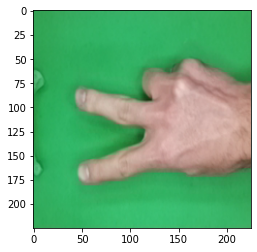

In [ ]:
plt.imshow(list_images[idx])

In [ ]:
list_labels[idx]

2

In [ ]:
X_train = np.stack(list_images)
Y_train = np.stack(list_labels)

#**Building model**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:
class RPS_Classifier():
  def __init__(self):
    self.model = None
    self.label = ['rock', 'paper', 'scissors']

  def build_model(self):
    input_layer = Input(shape=[225, 225, 3])
    conv_2d_layer_1 = Conv2D(filters=32, kernel_size=3, activation="relu")(input_layer)
    max_pooling_layer_1 = MaxPooling2D()(conv_2d_layer_1)
    conv_2d_layer_2 = Conv2D(filters=64, kernel_size=3, activation='relu')(max_pooling_layer_1)
    max_pooling_layer_2 = MaxPooling2D()(conv_2d_layer_2)
    conv_2d_layer_3 = Conv2D(filters=128, kernel_size=3, activation='relu')(max_pooling_layer_2)
    max_pooling_layer_3 = MaxPooling2D()(conv_2d_layer_3)
    conv_2d_layer_4 = Conv2D(filters=128, kernel_size=3, activation='relu')(max_pooling_layer_3)
    max_pooling_layer_4 = MaxPooling2D()(conv_2d_layer_4)
    flatten_layer = Flatten()(max_pooling_layer_4)
    dense_layer_1 = Dense(32)(flatten_layer)
    output_layer = Dense(3, activation="softmax")(dense_layer_1)

    self.model = Model(input_layer, output_layer)
    self.model.summary()

  def train_model(self, X_train, Y_train):
    optimizer = Adam(learning_rate=1e-3)
    loss = SparseCategoricalCrossentropy()
    metric = SparseCategoricalAccuracy()

    self.model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
    self.model.fit(x=X_train, y=Y_train, batch_size=32, validation_split=0.2, epochs=10)

  def save_model(self):
    self.model.save('/content/classifier.h5')

  def load_model(self):
    self.model = load_model('/content/classifier.h5')

  def predict(self, img):
    np_img = np.array(img)
    np_img = np_img.reshape([1, 225, 225, 3])
    pred_prob = self.model.predict(np_img)
    print(pred_prob)
    prediction = self.label[np.argmax(pred_prob)]

    return prediction

In [ ]:
my_classifier = RPS_Classifier()

In [ ]:
my_classifier.build_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 225, 225, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 223, 223, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       7385

In [ ]:
my_classifier.train_model(X_train, Y_train)

Epoch 1/10
55/55 [==============================] - 4s 61ms/step - loss: 10.0710 - sparse_categorical_accuracy: 0.7623 - val_loss: 0.3228 - val_sparse_categorical_accuracy: 0.8813
Epoch 2/10
55/55 [==============================] - 3s 56ms/step - loss: 0.1629 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.6598 - val_sparse_categorical_accuracy: 0.7740
Epoch 3/10
55/55 [==============================] - 3s 56ms/step - loss: 0.1290 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.3803 - val_sparse_categorical_accuracy: 0.9018
Epoch 4/10
55/55 [==============================] - 3s 56ms/step - loss: 0.0687 - sparse_categorical_accuracy: 0.9754 - val_loss: 0.4098 - val_sparse_categorical_accuracy: 0.9110
Epoch 5/10
55/55 [==============================] - 3s 56ms/step - loss: 0.0379 - sparse_categorical_accuracy: 0.9903 - val_loss: 0.3174 - val_sparse_categorical_accuracy: 0.9452
Epoch 6/10
55/55 [==============================] - 3s 57ms/step - loss: 0.0448 - sparse_categorical_acc

In [ ]:
my_classifier.save_model()

In [ ]:
my_classifier.load_model()

In [ ]:
img = Image.open('/content/datasets/scissors/EKecGY0Gk9GJjT5n.png').resize([225, 225])

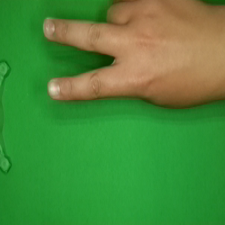

In [ ]:
img

In [ ]:
my_classifier.predict(img)

[[1.2920424e-10 5.0768097e-08 1.0000000e+00]]


'scissors'